In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from eda_utils import *

In [2]:
# set path
import os
os.chdir('..')

In [3]:
# set params for matplotlib and seaborn
set_params()

# get data
data = get_data()

# preprocess data
data = preprocess_data(data)

data

   AmountSold_by_Kilo  AvgPrice_per_Kilo  YearNum  MonthNum FishGroup Country
0         2385.445111           6.900461     2023         1       Cod     USA
1          215.003039           3.703762     2023         1   Haddock     USA
2           32.658689           3.924224     2023         1       Cod     USA
3         5855.430868           5.114718     2023         1   Haddock     USA
4         1518.629061           5.555642     2023         1      Hake     USA
OUTLIERS:
      YYYY/MM FishGroup    Country  AmountSold_by_Kilo  AvgPrice_per_Kilo  \
2340  2022-03       Cod  FAROE IS.                64.0               75.0   

     Imported  
2340      Yes  


,YYYY/MM,FishGroup,Country,AmountSold_by_Kilo,AvgPrice_per_Kilo,Imported
0,2004-01,Cod,USA,37891.790876,4.419322,No
1,2004-01,Haddock,USA,24066.278996,3.743735,No
2,2004-01,Hake,USA,103171.068030,2.091564,No
3,2004-01,Pollock,USA,56597.962461,1.410748,No
4,2004-01,Redfish,USA,6455.987880,1.807788,No
...,...,...,...,...,...,...
2662,2024-01,Haddock,FAROE IS.,92694.000000,3.702699,Yes
2663,2024-01,Haddock,ICELAND,436025.000000,8.873429,Yes
2664,2024-01,Haddock,NORWAY,578762.000000,3.324736,Yes
2665,2024-01,Hake,SPAIN,2605.000000,3.795777,Yes


In [4]:
data.groupby('Country')['AvgPrice_per_Kilo'].mean().sort_values(ascending=False)

Country
LATVIA                16.000689
NORWAY                 8.782617
GREENLAND              8.125947
ICELAND                7.697597
DENMARK                6.961678
NETHERLANDS            6.770562
GERMANY                6.714913
UNITED KINGDOM         6.400373
RUSSIAN FEDERATION     6.250318
POLAND                 6.234752
FAROE IS.              4.041017
USA                    3.745200
FRANCE                 3.661809
PORTUGAL               3.491549
SPAIN                  3.373768
ITALY                  3.168689
SWEDEN                 3.090004
MONTENEGRO             2.164168
GREECE                 2.092404
LITHUANIA              1.824148
UKRAINE                1.792243
ALBANIA                1.750000
BOSNIA-HERCEGOVINA     1.695254
CROATIA                1.552619
ROMANIA                1.533385
BULGARIA               1.461316
SERBIA & KOSOVO        1.347740
IRELAND                0.975000
Name: AvgPrice_per_Kilo, dtype: float64

In [5]:
countries = data['Country'].value_counts()[1:4].index.values
countries

array(['ICELAND', 'NORWAY', 'RUSSIAN FEDERATION'], dtype=object)

In [6]:
data_filtered = data[data['Country'].isin(['ICELAND', 'NORWAY', 'RUSSIAN FEDERATION'])]
data_filtered

,YYYY/MM,FishGroup,Country,AmountSold_by_Kilo,AvgPrice_per_Kilo,Imported
60,2005-01,Cod,NORWAY,7030.0,13.844381,Yes
62,2005-01,Haddock,NORWAY,1300.0,12.629231,Yes
65,2005-01,Pollock,ICELAND,1542.0,3.051232,Yes
68,2005-02,Cod,RUSSIAN FEDERATION,6059.0,5.004456,Yes
70,2005-02,Haddock,RUSSIAN FEDERATION,17781.0,1.757944,Yes
...,...,...,...,...,...,...
2660,2024-01,Cod,ICELAND,547613.0,10.672972,Yes
2661,2024-01,Cod,NORWAY,132717.0,5.831393,Yes
2663,2024-01,Haddock,ICELAND,436025.0,8.873429,Yes
2664,2024-01,Haddock,NORWAY,578762.0,3.324736,Yes


In [11]:

# Drop the 'Country' column
data_without_country = data.drop('Country', axis=1)

# Create a unique identifier for each fish group by its import status
data_without_country['FishGroup_ImportStatus'] = np.where(data_without_country['Imported'] == 'Yes',
                                                          data_without_country['FishGroup'] + "_Imported",
                                                          data_without_country['FishGroup'] + "_Domestic")

# Pivot the table to have dates as rows and the unique fish group import statuses as columns, with average prices as values
df = data_without_country.pivot_table(index='YYYY/MM', 
                                               columns='FishGroup_ImportStatus', 
                                               values='AvgPrice_per_Kilo',
                                               aggfunc='mean')
df.head()

FishGroup_ImportStatus,Cod_Domestic,Cod_Imported,Haddock_Domestic,Haddock_Imported,Hake_Domestic,Hake_Imported,Pollock_Domestic,Pollock_Imported,Redfish_Domestic,Redfish_Imported
YYYY/MM,,,,,,,,,,
2004-01,4.419322,NaN,3.743735,NaN,2.091564,NaN,1.410748,NaN,1.807788,NaN
2004-02,3.637451,NaN,2.893345,NaN,1.658112,NaN,1.519010,NaN,1.124356,NaN
2004-03,3.444920,NaN,3.208133,NaN,2.035425,NaN,1.737086,NaN,1.455049,NaN
2004-04,3.179624,NaN,2.655904,NaN,3.226395,NaN,1.884585,NaN,1.455049,NaN
2004-05,3.937936,NaN,2.268643,NaN,1.743420,NaN,1.224154,NaN,1.521188,NaN


<Axes: >

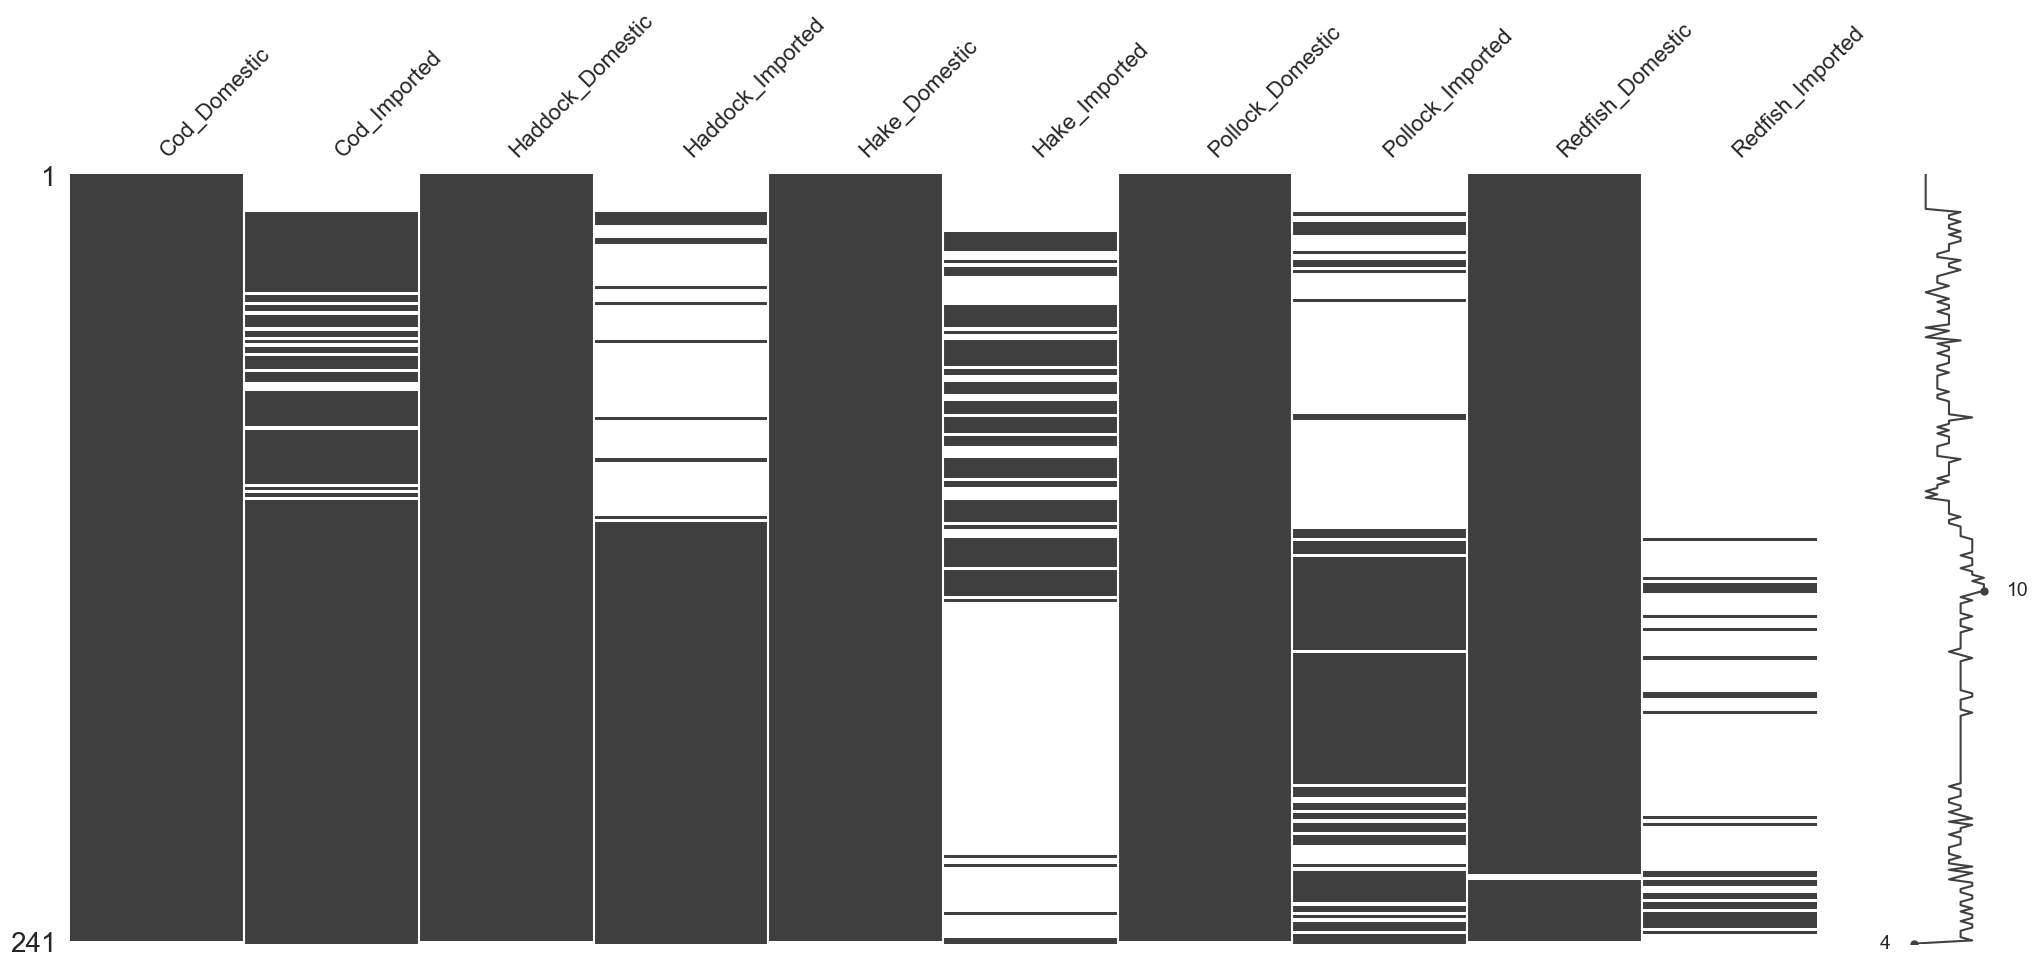

In [12]:
import missingno as msn



msn.matrix(df)


In [13]:
# Filtering the DataFrame for a range of periods
start_period = pd.Period('2014-01', freq='M')
end_period = pd.Period('2024-04', freq='M')
filtered_df_range = df[(df.index >= start_period) & (df.index <= end_period)].copy()


<Axes: >

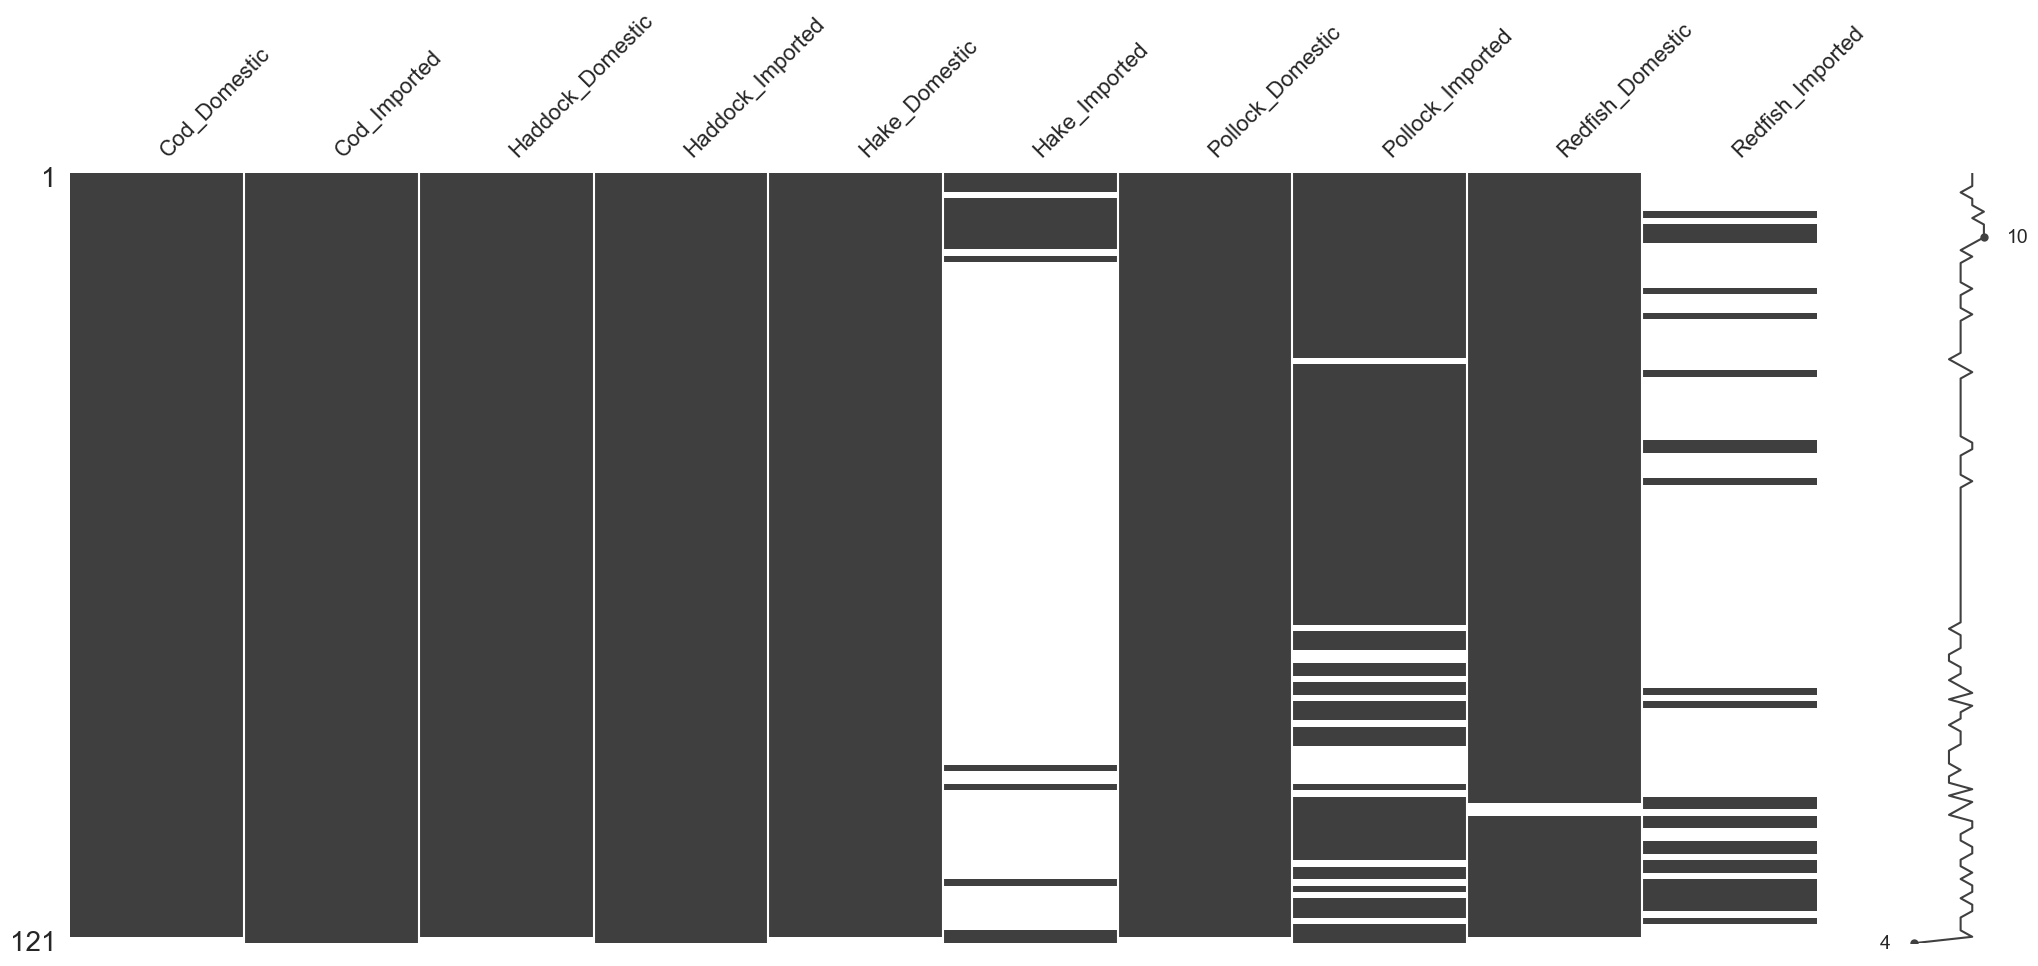

In [14]:
msn.matrix(filtered_df_range)

<Axes: >

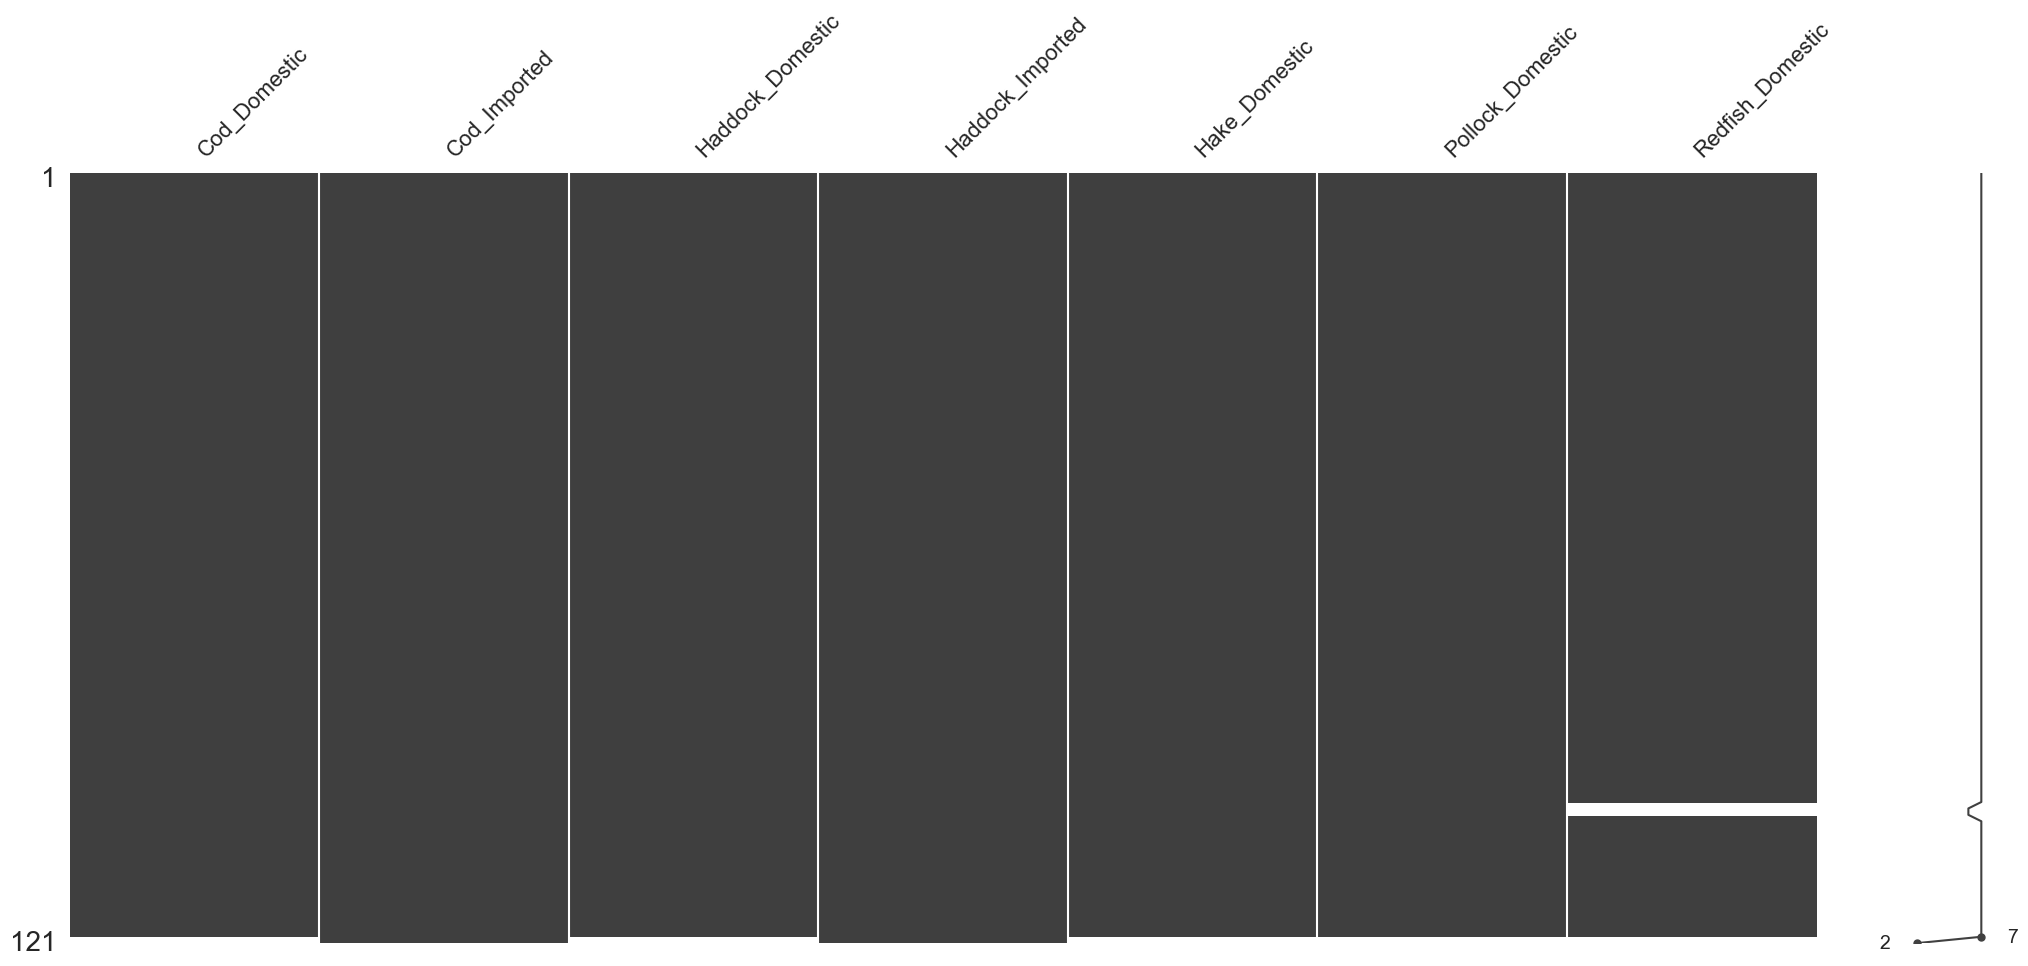

In [15]:
filtered_df_range = filtered_df_range.drop(['Hake_Imported', 'Redfish_Imported', 'Redfish_Imported', 'Pollock_Imported'], axis=1)
msn.matrix(filtered_df_range)

<Axes: >

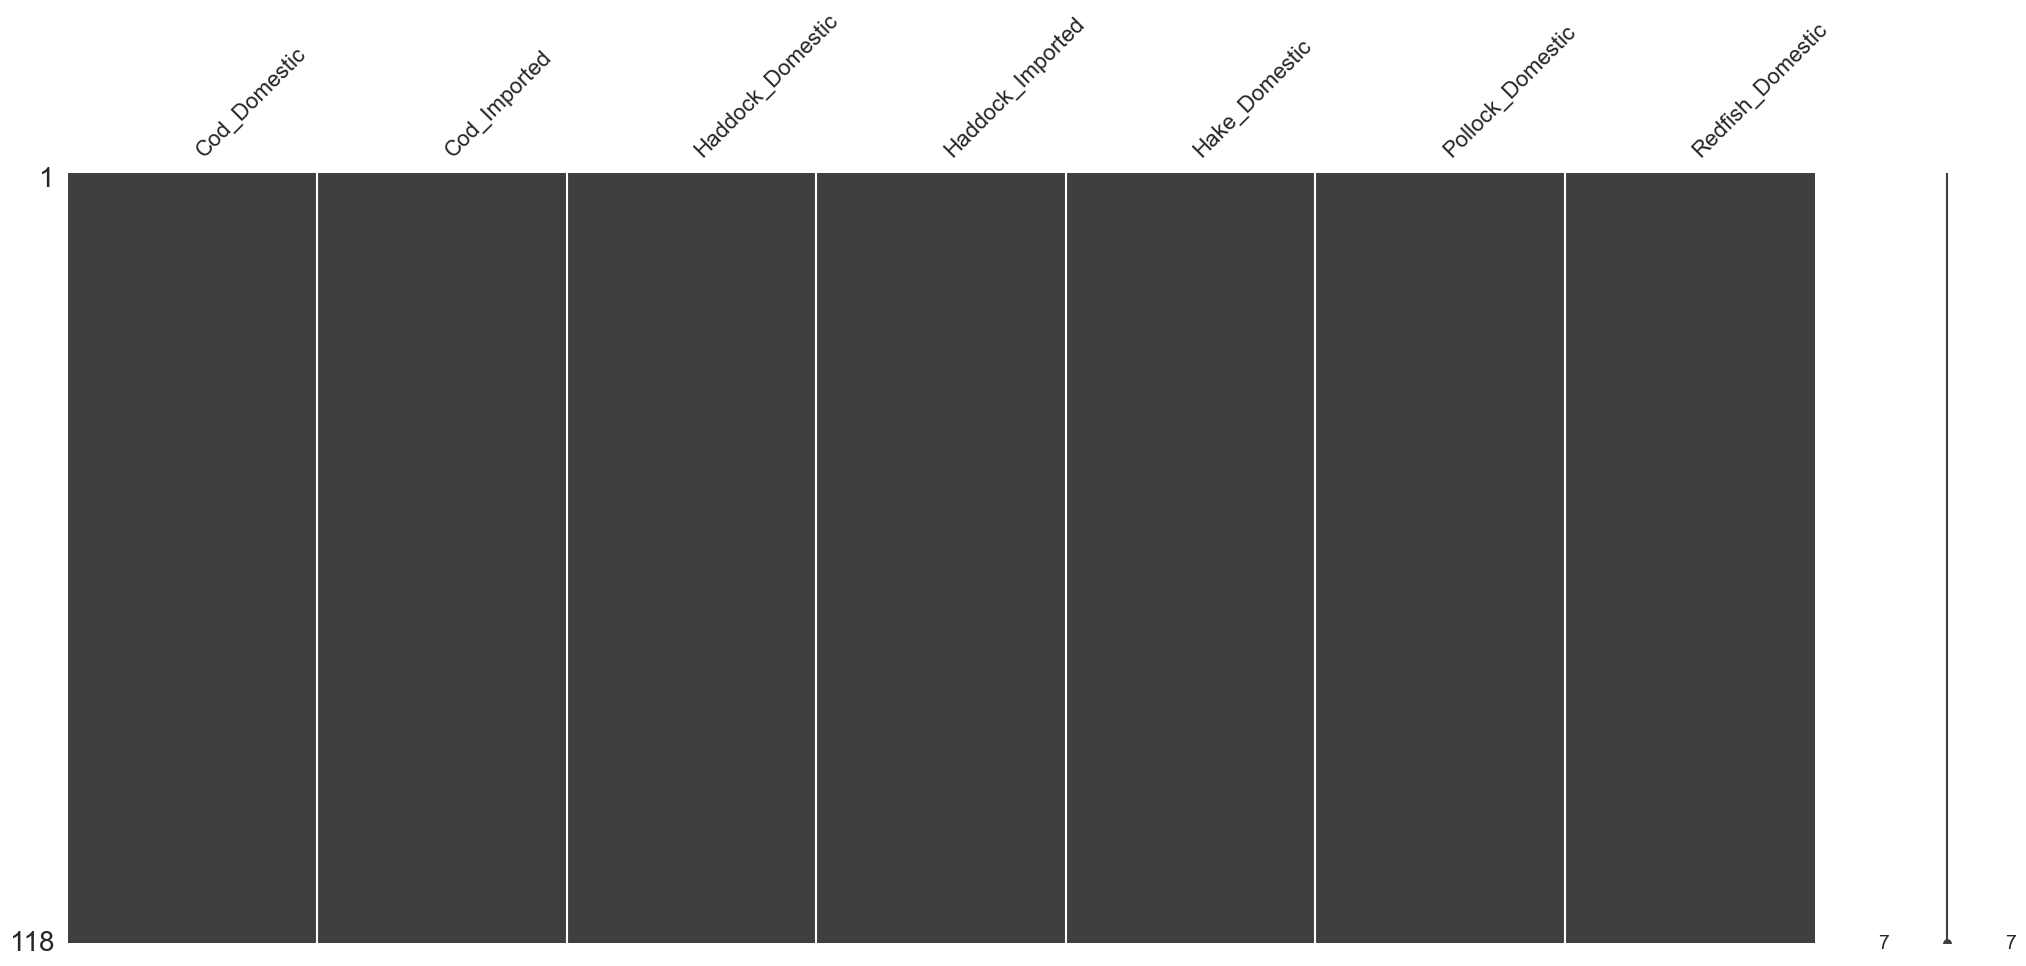

In [16]:
filtered_df_range.dropna(axis=0, inplace=True)
msn.matrix(filtered_df_range)

In [17]:
filtered_df_range

FishGroup_ImportStatus,Cod_Domestic,Cod_Imported,Haddock_Domestic,Haddock_Imported,Hake_Domestic,Pollock_Domestic,Redfish_Domestic
YYYY/MM,,,,,,,
2014-01,6.564277,5.432189,3.632076,6.094472,5.390747,2.754788,1.587326
2014-02,4.724613,5.419307,4.505383,6.705129,4.184428,2.851862,1.873927
2014-03,4.780944,6.123667,3.940501,7.217487,3.514896,1.946293,1.719604
2014-04,7.160816,5.397835,2.925727,6.273284,6.402688,3.191612,1.829835
2014-05,5.588681,6.634645,5.245029,7.691731,5.082652,3.245136,1.410957
...,...,...,...,...,...,...,...
2023-08,8.296003,10.578660,5.058450,6.068202,5.381039,6.132687,1.763696
2023-09,7.832365,11.711785,4.656625,6.002178,5.330927,6.659265,1.433003
2023-10,5.584164,10.533636,4.012876,5.869079,3.343172,5.567629,1.300726


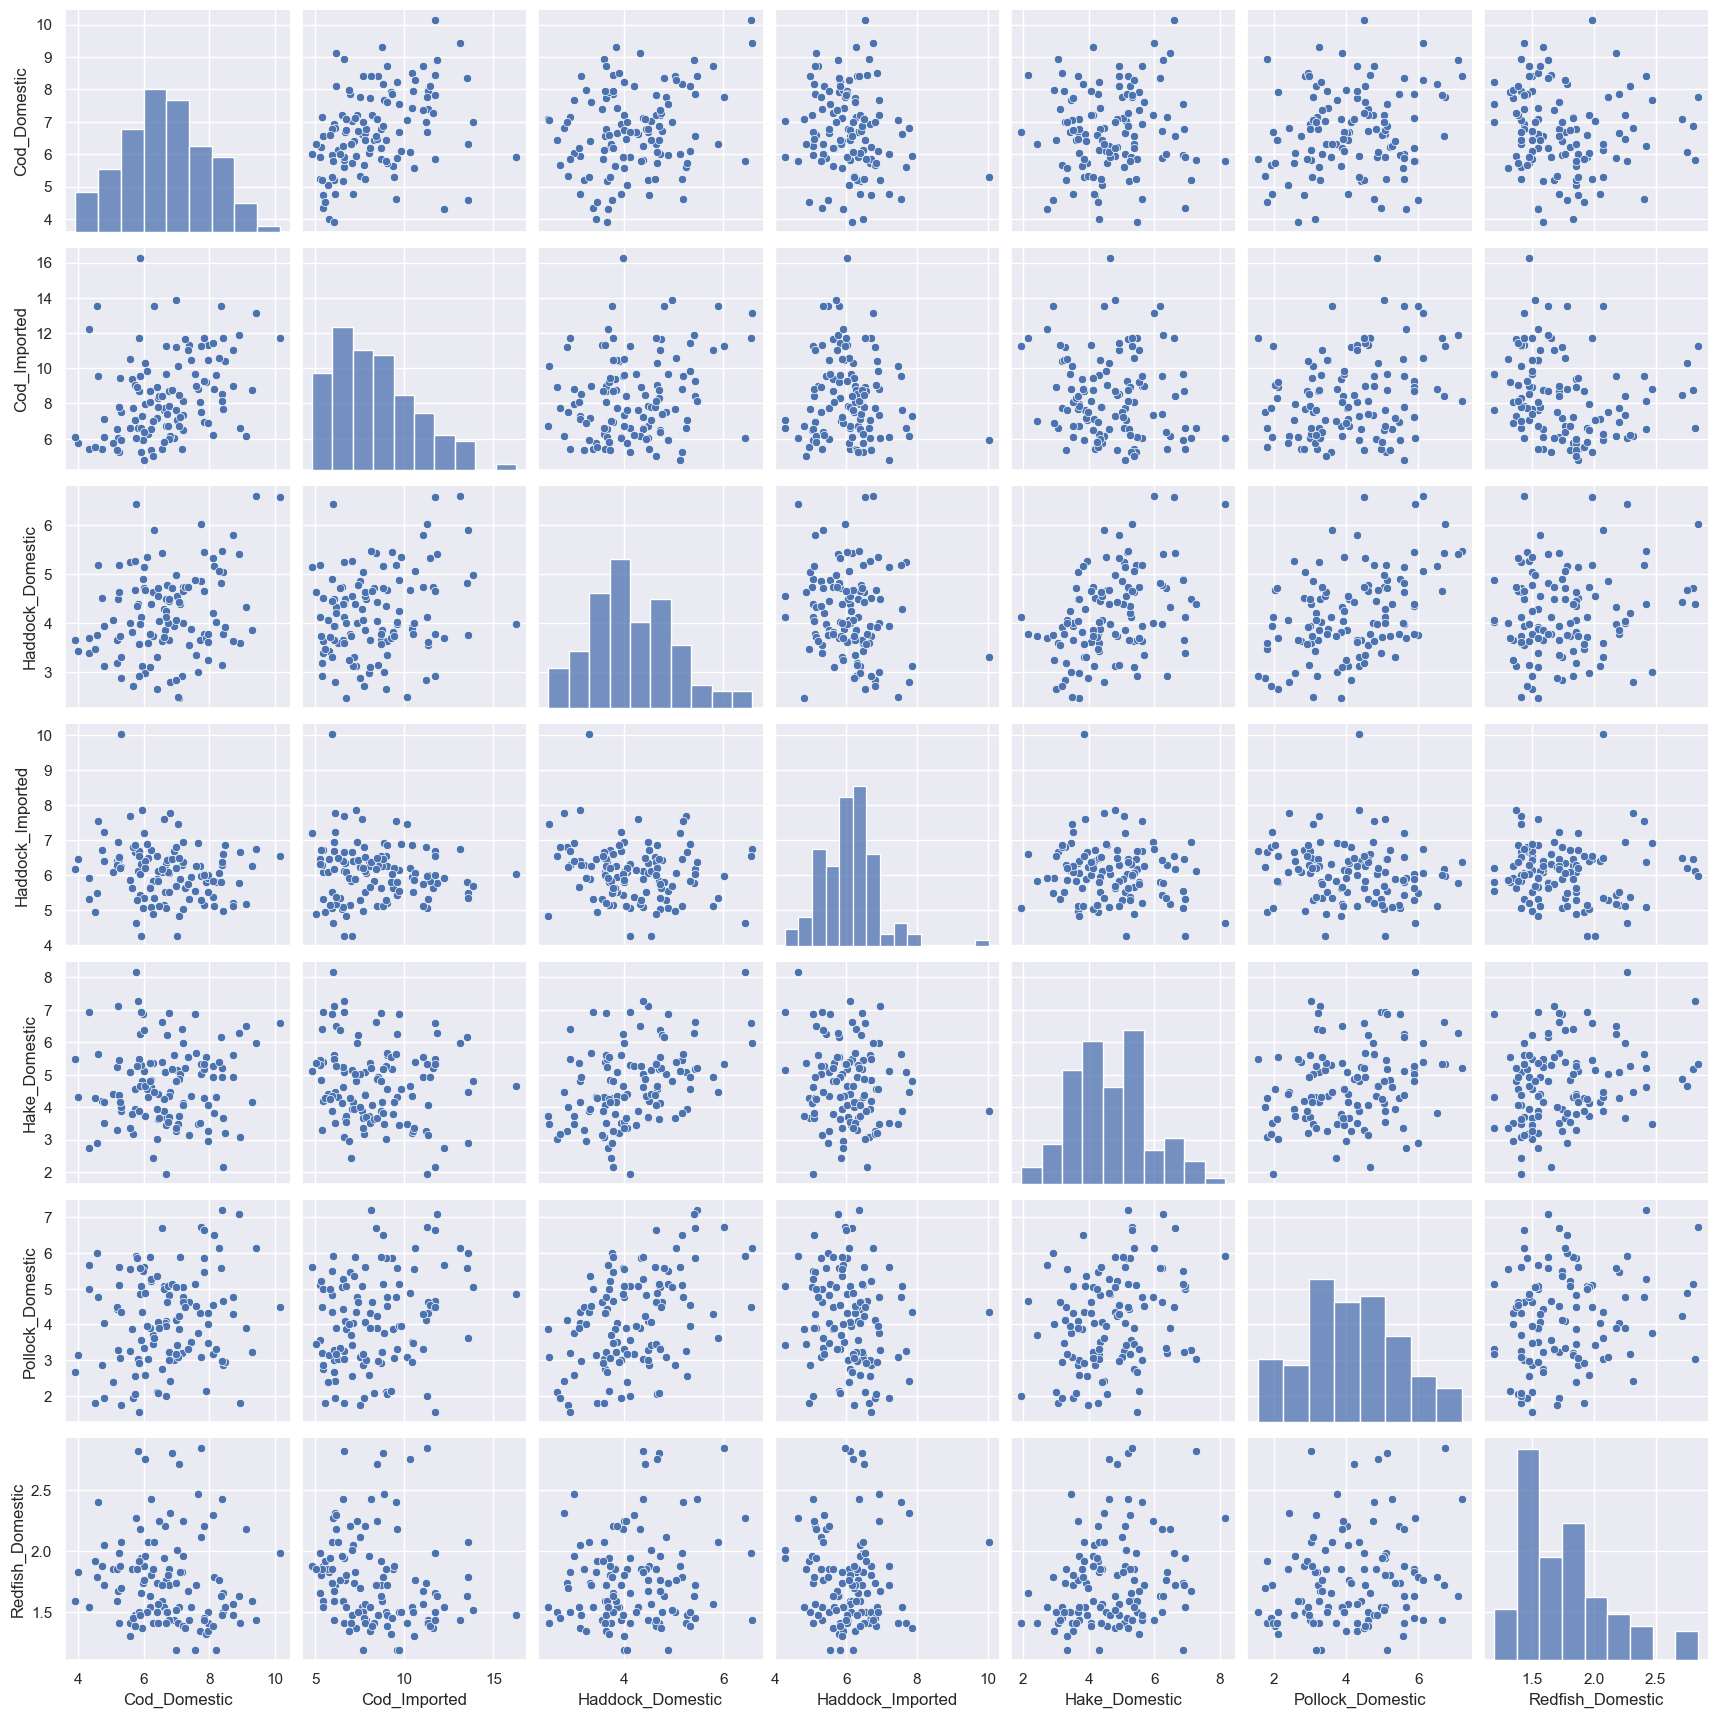

In [18]:
sns.pairplot(data=filtered_df_range)

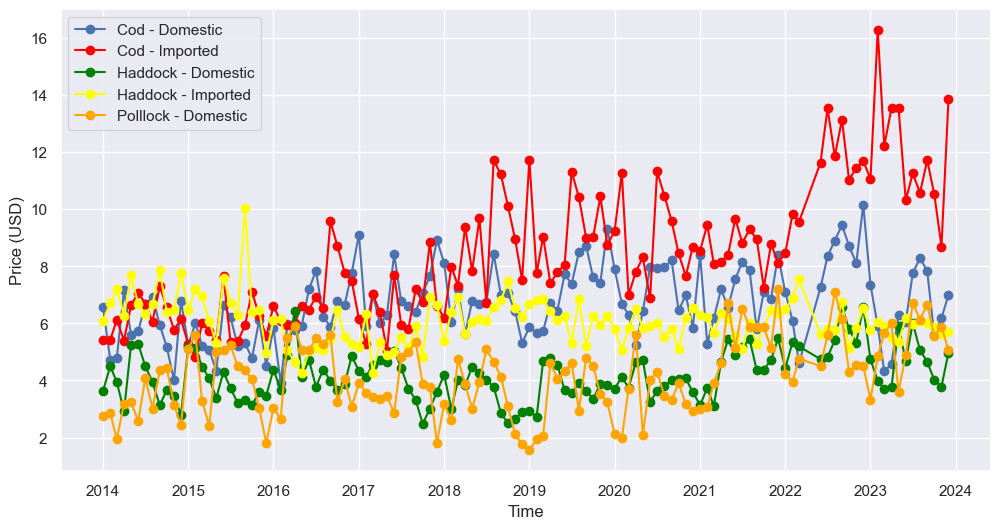

In [19]:
plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Cod_Domestic, marker='o', label='Cod - Domestic')
plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Cod_Imported, marker='o', color='red', label='Cod - Imported')
plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Haddock_Domestic, marker='o', color='green', label='Haddock - Domestic')
plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Haddock_Imported, marker='o', color='yellow', label='Haddock - Imported')
plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Pollock_Domestic, marker='o', color='orange', label='Polllock - Domestic')
#plt.plot(filtered_df_range.index.to_timestamp(), filtered_df_range.Pollock_Imported, marker='o', color='purple', label='Pollock - Imported')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.show();

# Pearson Correlations

In [20]:
correlation = filtered_df_range.Haddock_Imported.corr(filtered_df_range.Pollock_Domestic)
correlation

-0.16861854630509757

In [21]:
correlation = filtered_df_range.Cod_Imported.corr(filtered_df_range.Pollock_Domestic)
correlation

0.24417538946165449

In [22]:
correlation = filtered_df_range.Cod_Imported.corr(filtered_df_range.Haddock_Imported)
correlation

-0.06472604218756872

# Regressions

In [23]:
# multi linear regression

X = filtered_df_range[['Cod_Imported', 'Cod_Domestic', 'Haddock_Imported', 'Haddock_Domestic', 'Hake_Domestic']]
y = filtered_df_range[['Pollock_Domestic']]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
residuals = y - y_pred

model.score(X, y)

0.24376022209042625

In [24]:
# multi linear regression

X = filtered_df_range[['Cod_Imported', 'Cod_Domestic', 'Haddock_Imported', 'Haddock_Domestic']]
y = filtered_df_range[['Pollock_Domestic']]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
residuals = y - y_pred

model.score(X, y)

0.22507694573262882

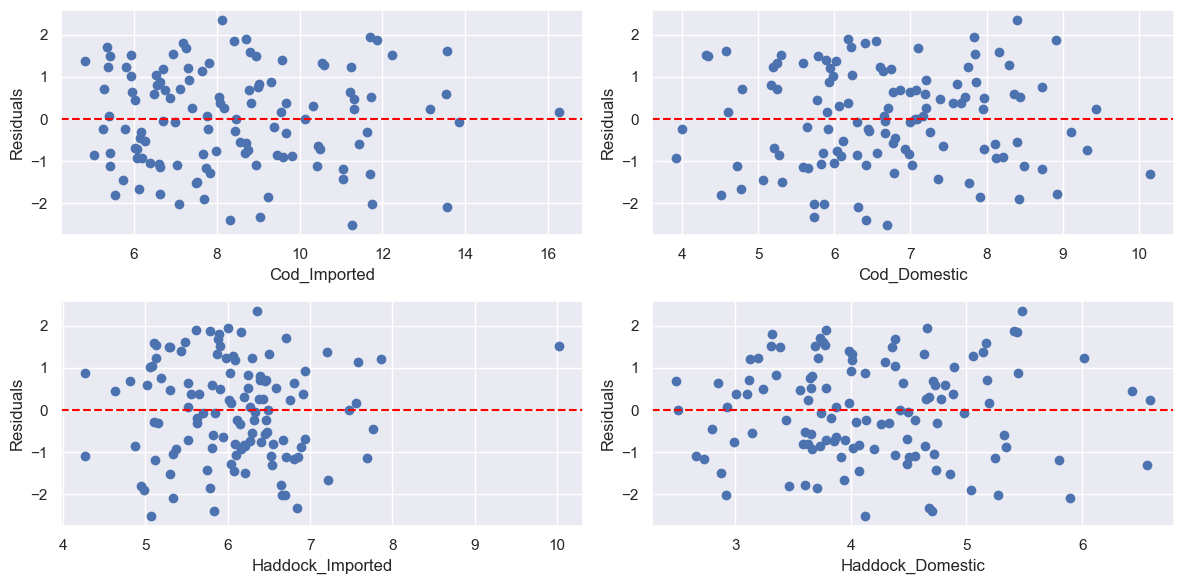

In [25]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].scatter(filtered_df_range[['Cod_Imported']], residuals)
ax[0, 0].axhline(0, color='red', linestyle='--')  
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].set_xlabel('Cod_Imported')


ax[0, 1].scatter(filtered_df_range[['Cod_Domestic']], residuals)
ax[0, 1].axhline(0, color='red', linestyle='--')  
ax[0, 1].set_ylabel('Residuals')
ax[0, 1].set_xlabel('Cod_Domestic')


ax[1, 0].scatter(filtered_df_range[['Haddock_Imported']], residuals)
ax[1, 0].axhline(0, color='red', linestyle='--')  
ax[1, 0].set_ylabel('Residuals')
ax[1, 0].set_xlabel('Haddock_Imported')


ax[1, 1].scatter(filtered_df_range[['Haddock_Domestic']], residuals)
ax[1, 1].axhline(0, color='red', linestyle='--')  
ax[1, 1].set_ylabel('Residuals')
ax[1, 1].set_xlabel('Haddock_Domestic')

plt.tight_layout()
plt.show();

In [26]:
# multi linear regression

X = filtered_df_range[['Cod_Imported', 'Haddock_Imported']]
y = filtered_df_range[['Pollock_Domestic']]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
residuals = y - y_pred
model.score(X, y)

0.0830719959834686

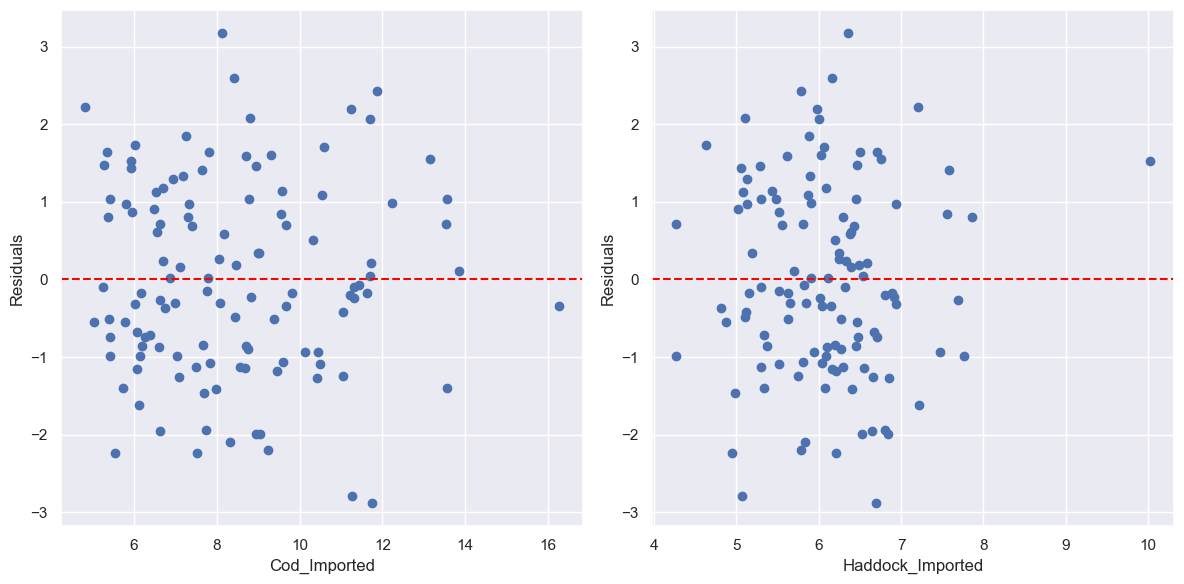

In [27]:
fig, ax = plt.subplots(1, 2)

ax[0].scatter(filtered_df_range[['Cod_Imported']], residuals)
ax[0].axhline(0, color='red', linestyle='--')  
ax[0].set_ylabel('Residuals')
ax[0].set_xlabel('Cod_Imported')


ax[1].scatter(filtered_df_range[['Haddock_Imported']], residuals)
ax[1].axhline(0, color='red', linestyle='--')  
ax[1].set_ylabel('Residuals')
ax[1].set_xlabel('Haddock_Imported')

plt.tight_layout()
plt.show();

In [28]:
# simple linear regression

X = filtered_df_range[['Cod_Imported']]
y = filtered_df_range[['Pollock_Domestic']]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
residuals = y - y_pred
model.score(X, y)

0.059621620818750776

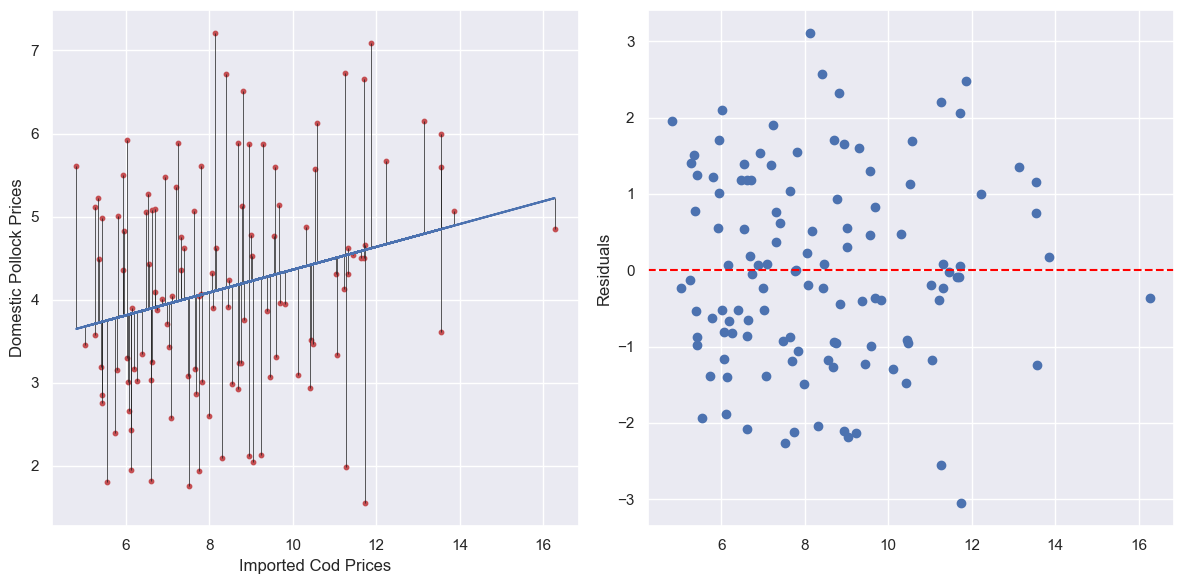

In [29]:
fig, ax = plt.subplots(1, 2)

ax[0].vlines(X, ymin=y, ymax=y_pred, color='k', linewidth=.5)
ax[0].scatter(X, y, c='r', s=10)
ax[0].plot(X, y_pred, c='b')
ax[0].set_ylabel('Domestic Pollock Prices')
ax[0].set_xlabel('Imported Cod Prices')


ax[1].scatter(X, residuals)
ax[1].axhline(0, color='red', linestyle='--')  
ax[1].set_ylabel('Residuals')
ax[1].set_xlabel('')

plt.tight_layout()
plt.show();

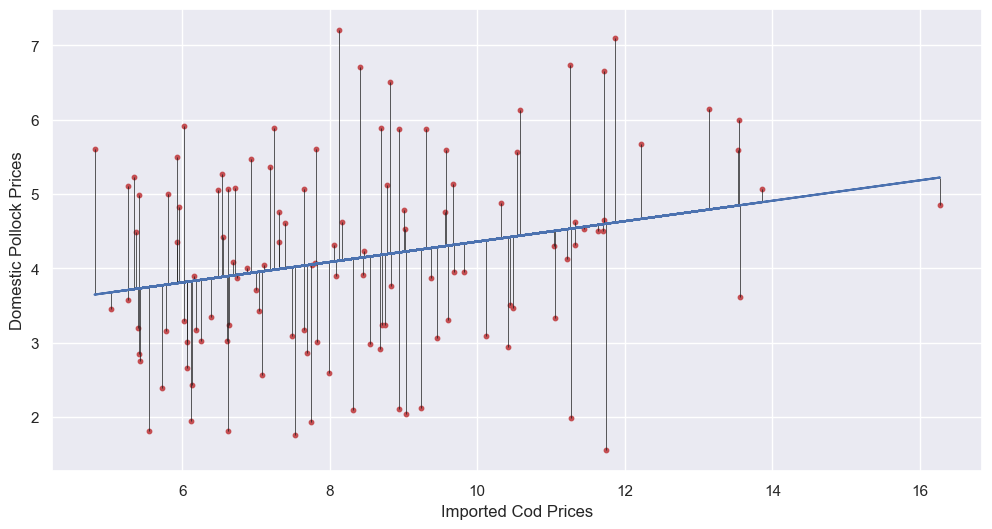

In [30]:
plt.vlines(X, ymin=y, ymax=y_pred, color='k', linewidth=.5)
plt.scatter(X, y, c='r', s=10)
plt.plot(X, y_pred, c='b')
plt.ylabel('Domestic Pollock Prices')
plt.xlabel('Imported Cod Prices')
plt.show;

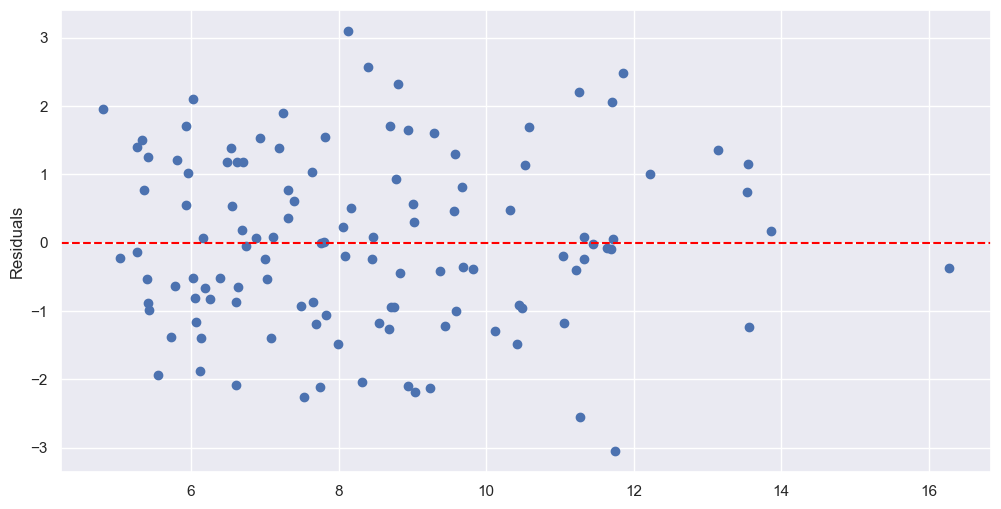

In [31]:
plt.scatter(X, residuals)
plt.axhline(0, color='red', linestyle='--')  
plt.ylabel('Residuals')
plt.xlabel('')
plt.show();